In [1]:
%reload_ext autoreload
%autoreload 2

import qiskit_metal as metal
from qiskit_metal import designs, draw
from qiskit_metal import MetalGUI, Dict, Headings
import pyEPR as epr

In [2]:
design = designs.DesignPlanar({}, True)
design.chips.main.size['size_x'] = '2mm'
design.chips.main.size['size_y'] = '2mm'

gui = MetalGUI(design)

In [3]:
from qiskit_metal.qlibrary.qubits.transmon_pocket import TransmonPocket

design.delete_all_components()

q1 = TransmonPocket(design, 'Q1', options = dict(
    pad_width = '425 um',
    pocket_height = '650um',
    connection_pads=dict(
        readout = dict(loc_W=+1,loc_H=+1, pad_width='200um')
    )))

gui.rebuild()
gui.autoscale()

In [4]:
from qiskit_metal.analyses.quantization import EPRanalysis

In [5]:
eig_qb = EPRanalysis(design, "hfss")

In [6]:
eig_qb.sim.setup

{'name': 'Setup',
 'reuse_selected_design': True,
 'reuse_setup': True,
 'min_freq_ghz': 1,
 'n_modes': 1,
 'max_delta_f': 0.5,
 'max_passes': 10,
 'min_passes': 1,
 'min_converged': 1,
 'pct_refinement': 30,
 'basis_order': 1,
 'vars': {'Lj': '10 nH', 'Cj': '0 fF'}}

In [7]:
# example: update single setting
eig_qb.sim.setup.max_passes = 6
eig_qb.sim.setup.vars.Lj = '11 nH'
# example: update multiple settings
eig_qb.sim.setup_update(max_delta_f = 0.4, min_freq_ghz = 1.1)

eig_qb.sim.setup

{'name': 'Setup',
 'reuse_selected_design': True,
 'reuse_setup': True,
 'min_freq_ghz': 1.1,
 'n_modes': 1,
 'max_delta_f': 0.4,
 'max_passes': 6,
 'min_passes': 1,
 'min_converged': 1,
 'pct_refinement': 30,
 'basis_order': 1,
 'vars': {'Lj': '11 nH', 'Cj': '0 fF'}}

In [8]:
eig_qb.sim.run(name="Qbit", components=['Q1'], open_terminations=[], box_plus_buffer = False)
eig_qb.sim.plot_convergences()

INFO 07:30AM [connect_project]: Connecting to Ansys Desktop API...
INFO 07:30AM [load_ansys_project]: 	Opened Ansys App
INFO 07:30AM [load_ansys_project]: 	Opened Ansys Desktop v2025.1.0
INFO 07:30AM [load_ansys_project]: 	Opened Ansys Project
	Folder:    D:/Box/QuantumMetal/FourQubits/
	Project:   EPRAnalysis
INFO 07:30AM [connect_design]: No active design found (or error getting active design).
INFO 07:30AM [connect]: 	 Connected to project "EPRAnalysis". No design detected
INFO 07:30AM [connect_design]: 	Opened active design
	Design:    Qbit_hfss [Solution type: Eigenmode]
WARNING 07:30AM [connect_setup]: 	No design setup detected.
WARNING 07:30AM [connect_setup]: 	Creating eigenmode default setup.
INFO 07:30AM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)
INFO 07:30AM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)
INFO 07:30AM [analyze]: Analyzing setup Setup
07:31AM 10s INFO [get_f_convergence]: Saved convergences to D:\Box\Quantu

In [ ]:
# eig_qb.setup.run    <- direct access
#eig_qb.sim.print_run_args()

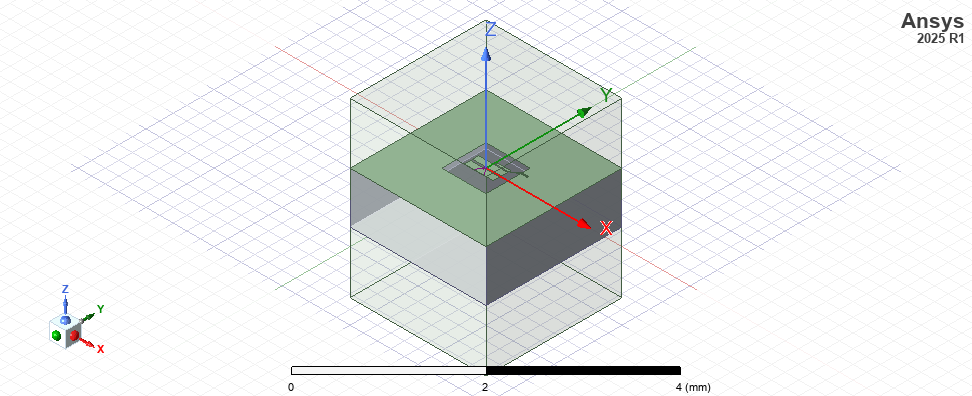

WindowsPath('D:/Box/QuantumMetal/FourQubits/ansys.png')

In [9]:
eig_qb.sim.save_screenshot()

In [10]:
eig_qb.sim.convergence_f

,re(Mode(1)) [g]
Pass [],
1,3.161556
2,4.767850
3,5.756671
4,6.009428
5,6.131182
6,6.201098


In [11]:
eig_qb.sim.setup.min_freq_ghz = 4
eig_qb.sim.run()
eig_qb.sim.convergence_f

INFO 07:33AM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)
INFO 07:33AM [analyze]: Analyzing setup Setup
07:33AM 19s INFO [get_f_convergence]: Saved convergences to D:\Box\QuantumMetal\FourQubits\hfss_eig_f_convergence.csv


,re(Mode(1)) [g]
Pass [],
1,41.108313
2,4.879058
3,5.504110
4,5.961907
5,6.108263
6,6.195272


In [16]:
eig_qb.sim.plot_fields('main')   # TODO:::: Ez, normal component.....decide which field typically on the qbit, or on the crossing between meanders

INFO 06:42AM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)


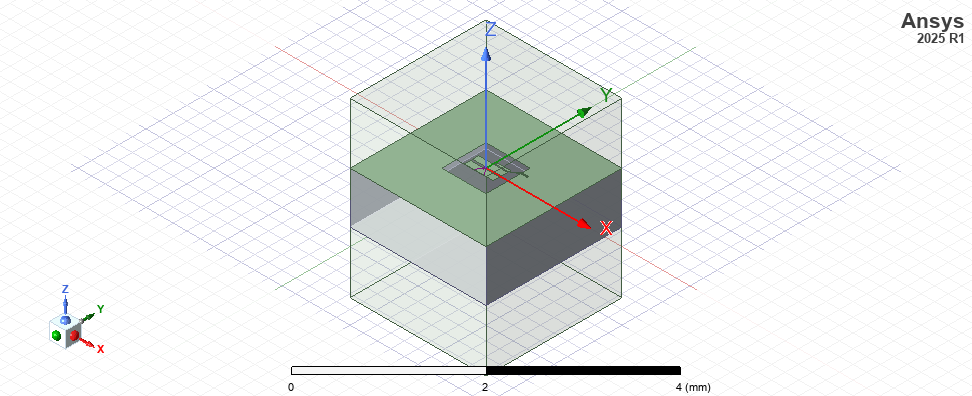

WindowsPath('D:/Box/QuantumMetal/FourQubits/ansys.png')

In [12]:
eig_qb.sim.save_screenshot()

In [13]:
eig_qb.sim.clear_fields()

In [23]:
s=eig_qb.setup

In [24]:
eig_qb.setup.junctions.jj.rect = 'JJ_rect_Lj_Q1_rect_jj'
eig_qb.setup.junctions.jj.line = 'JJ_Lj_Q1_rect_jj_'
eig_qb.setup

{'junctions': {'jj': {'Lj_variable': 'Lj',
   'Cj_variable': 'Cj',
   'rect': 'JJ_rect_Lj_Q1_rect_jj',
   'line': 'JJ_Lj_Q1_rect_jj_'}},
 'dissipatives': {'dielectrics_bulk': ['main']},
 'cos_trunc': 8,
 'fock_trunc': 7,
 'sweep_variable': 'Lj'}

In [25]:
eig_qb.epr_start()

Design "Qbit_hfss" info:
	# eigenmodes    1
	# variations    1


{'junctions': {'jj': {'Lj_variable': 'Lj',
   'Cj_variable': 'Cj',
   'rect': 'JJ_rect_Lj_Q1_rect_jj',
   'line': 'JJ_Lj_Q1_rect_jj_'}},
 'dissipatives': {'dielectrics_bulk': ['main']}}

In [26]:
eig_qb.get_stored_energy()

Design "Qbit_hfss" info:
	# eigenmodes    1
	# variations    1
Design "Qbit_hfss" info:
	# eigenmodes    1
	# variations    1

        energy_elec_all       = 6.12634544217629e-24
        energy_elec_substrate = 5.63695318295517e-24
        EPR of substrate = 92.0%

        energy_mag    = 3.19602434627728e-26
        energy_mag % of energy_elec_all  = 0.5%
        


In [27]:
eig_qb.run_analysis()


Variation 0  [1/1]

  Mode 0 at 6.20 GHz   [1/1]
    Calculating ℰ_magnetic,ℰ_electric
       (ℰ_E-ℰ_H)/ℰ_E       ℰ_E       ℰ_H
               99.5%  3.063e-24 1.598e-26

    Calculating junction energy participation ration (EPR)
	method=`line_voltage`. First estimates:
	junction        EPR p_0j   sign s_0j    (p_capacitive)
		Energy fraction (Lj over Lj&Cj)= 96.77%
	jj              0.904042  (+)        0.0301364
		(U_tot_cap-U_tot_ind)/mean=6.23%
Calculating Qdielectric_main for mode 0 (0/0)
p_dielectric_main_0 = 0.9201167704563405


com_error: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024382), None)

In [28]:
eig_qb.spectrum_analysis(s.cos_trunc, s.fock_trunc)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\data-pyEPR\\EPRAnalysis\\Qbit_hfss\\2026-01-20 07-40-17.npz'

In [29]:
eig_qb.report_hamiltonian(s.swp_variable)

AttributeError: 'QHFSSRenderer' object has no attribute 'epr_quantum_analysis'

In [30]:
eig_qb.run_epr()

#### equivalent individual calls
# s = self.setup
# eig_qb.epr_start()
# eig_qb.get_stored_energy()
# eig_qb.run_analysis()
# eig_qb.spectrum_analysis(s.cos_trunc, s.fock_trunc)
# eig_qb.report_hamiltonian(s.swp_variable)

Design "Qbit_hfss" info:
	# eigenmodes    1
	# variations    1
Design "Qbit_hfss" info:
	# eigenmodes    1
	# variations    1

        energy_elec_all       = 6.12634544217629e-24
        energy_elec_substrate = 5.63695318295517e-24
        EPR of substrate = 92.0%

        energy_mag    = 3.19602434627728e-26
        energy_mag % of energy_elec_all  = 0.5%
        

Variation 0  [1/1]

  Mode 0 at 6.20 GHz   [1/1]
    Calculating ℰ_magnetic,ℰ_electric
       (ℰ_E-ℰ_H)/ℰ_E       ℰ_E       ℰ_H
               99.5%  3.063e-24 1.598e-26

    Calculating junction energy participation ration (EPR)
	method=`line_voltage`. First estimates:
	junction        EPR p_0j   sign s_0j    (p_capacitive)
		Energy fraction (Lj over Lj&Cj)= 96.77%
	jj              0.904042  (+)        0.0301364
		(U_tot_cap-U_tot_ind)/mean=6.23%
Calculating Qdielectric_main for mode 0 (0/0)
p_dielectric_main_0 = 0.9201167704563405


com_error: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024382), None)

In [31]:
print(eig_qb)

In [32]:
from qiskit_metal.qlibrary.terminations.open_to_ground import OpenToGround
from qiskit_metal.qlibrary.tlines.meandered import RouteMeander
otg = OpenToGround(design, 'open_to_ground', options=dict(pos_x='1.75mm',  pos_y='0um', orientation='0'))
RouteMeander(design, 'readout',  Dict(
        total_length='6 mm',
        hfss_wire_bonds = True,
        fillet='90 um',
        lead = dict(start_straight='100um'),
        pin_inputs=Dict(
            start_pin=Dict(component='Q1', pin='readout'),
            end_pin=Dict(component='open_to_ground', pin='open')), ))

gui.rebuild()
gui.autoscale()

In [33]:
eig_rd = EPRanalysis(design, "hfss")

In [34]:
eig_rd.sim.run(name="Readout",
               components=['readout', 'open_to_ground'],
               open_terminations=[('readout', 'start'), ('readout', 'end')])
eig_rd.sim.plot_convergences()

INFO 07:42AM [connect_design]: 	Opened active design
	Design:    Readout_hfss [Solution type: Eigenmode]
WARNING 07:42AM [connect_setup]: 	No design setup detected.
WARNING 07:42AM [connect_setup]: 	Creating eigenmode default setup.
INFO 07:42AM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)
INFO 07:42AM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)
INFO 07:42AM [analyze]: Analyzing setup Setup
07:42AM 58s INFO [get_f_convergence]: Saved convergences to D:\Box\QuantumMetal\FourQubits\hfss_eig_f_convergence.csv


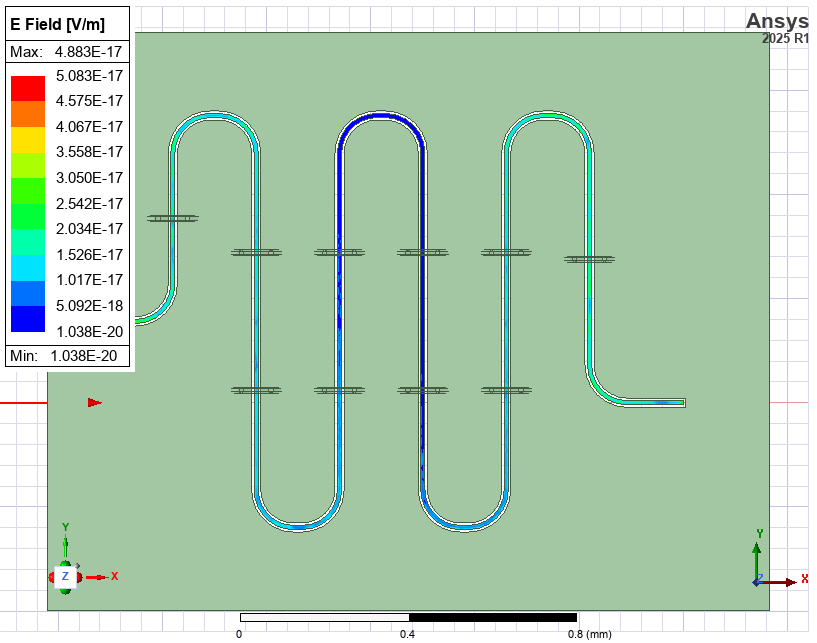

WindowsPath('D:/Box/QuantumMetal/FourQubits/ansys.png')

In [20]:
eig_rd.sim.save_screenshot()  # optional

In [35]:
eig_rd.get_frequencies()

Design "Readout_hfss" info:
	# eigenmodes    1
	# variations    1
Design "Readout_hfss" info:
	# eigenmodes    1
	# variations    1


,,Freq. (GHz),Quality Factor
variation,mode,,
0,0,9.679291,inf


INFO 07:48AM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)


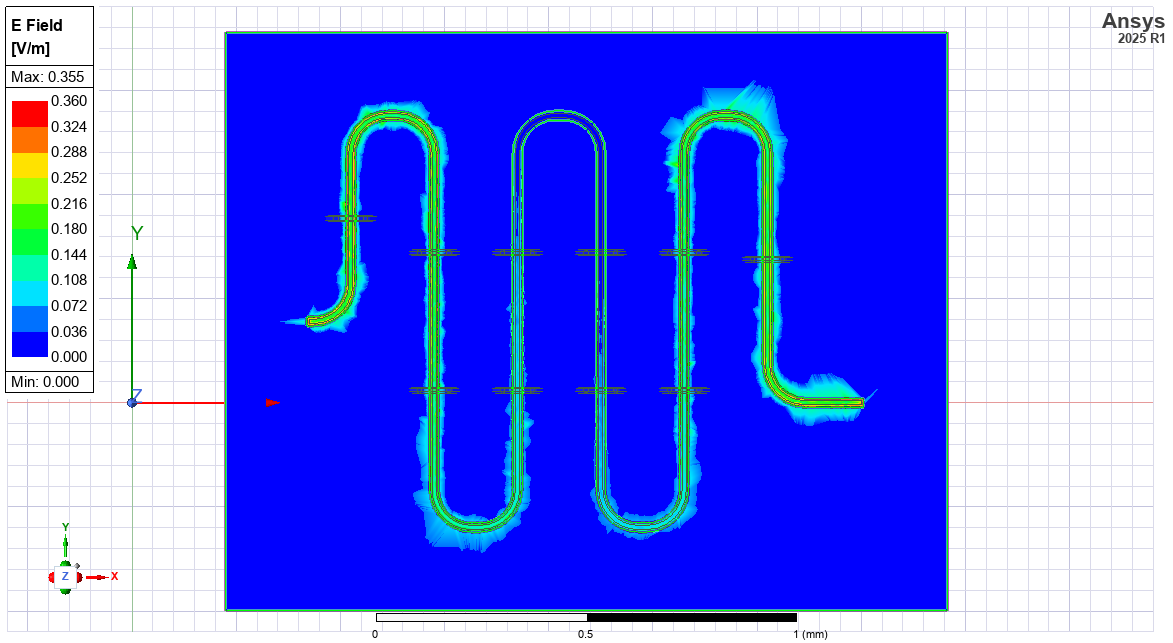

WindowsPath('D:/Box/QuantumMetal/FourQubits/ansys.png')

In [36]:
eig_rd.sim.plot_fields('main')
eig_rd.sim.save_screenshot()

In [37]:
eig_rd.sim.setup.max_passes = 15   # update single setting
eig_rd.sim.run()
eig_rd.sim.plot_convergences()

INFO 07:50AM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)
INFO 07:50AM [analyze]: Analyzing setup Setup
07:52AM 01s INFO [get_f_convergence]: Saved convergences to D:\Box\QuantumMetal\FourQubits\hfss_eig_f_convergence.csv


INFO 08:03AM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)


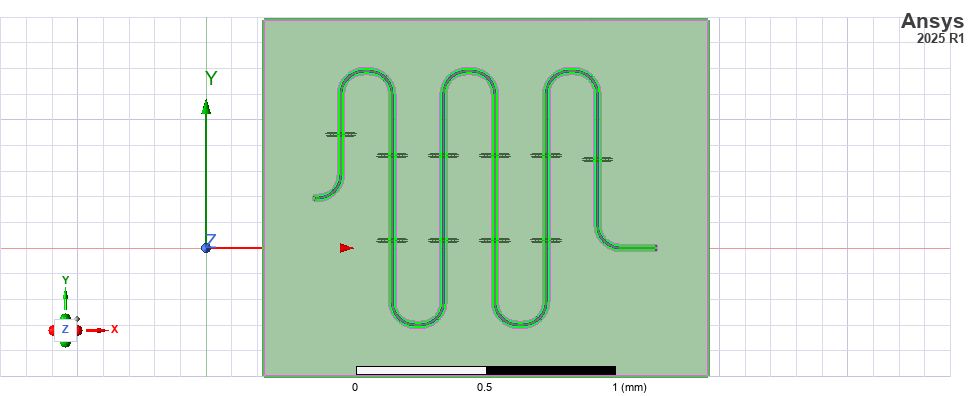

WindowsPath('D:/Box/QuantumMetal/FourQubits/ansys.png')

In [39]:
eig_rd.sim.plot_fields('main')
eig_rd.sim.save_screenshot()

In [40]:
eig_qres = EPRanalysis(design, "hfss")

In [41]:
eig_qres.sim.setup.n_modes = 2
eig_qres.sim.setup

{'name': 'Setup',
 'reuse_selected_design': True,
 'reuse_setup': True,
 'min_freq_ghz': 1,
 'n_modes': 2,
 'max_delta_f': 0.5,
 'max_passes': 10,
 'min_passes': 1,
 'min_converged': 1,
 'pct_refinement': 30,
 'basis_order': 1,
 'vars': {'Lj': '10 nH', 'Cj': '0 fF'}}

In [42]:
eig_qres.sim.run(name="TransmonResonator",
                 components=['Q1', 'readout', 'open_to_ground'],
                 open_terminations=[('readout', 'end')])
eig_qres.sim.plot_convergences()

INFO 08:03AM [connect_design]: 	Opened active design
	Design:    TransmonResonator_hfss [Solution type: Eigenmode]
WARNING 08:03AM [connect_setup]: 	No design setup detected.
WARNING 08:03AM [connect_setup]: 	Creating eigenmode default setup.
INFO 08:03AM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)
INFO 08:04AM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)
INFO 08:04AM [analyze]: Analyzing setup Setup
08:05AM 50s INFO [get_f_convergence]: Saved convergences to D:\Box\QuantumMetal\FourQubits\hfss_eig_f_convergence.csv


INFO 08:07AM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)


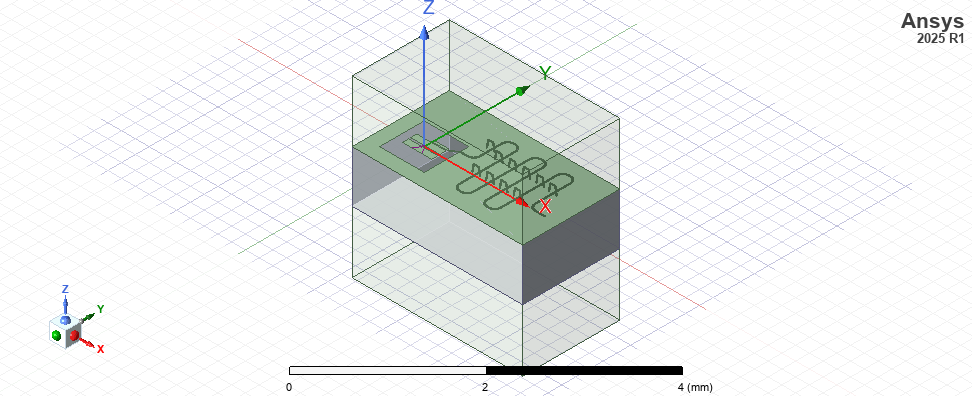

WindowsPath('D:/Box/QuantumMetal/FourQubits/ansys.png')

In [43]:
eig_qres.sim.plot_fields('main', eigenmode=1)
eig_qres.sim.save_screenshot()

In [46]:
eig_qres.setup.junctions.jj.rect = 'JJ_rect_Lj_Q1_rect_jj'
eig_qres.setup.junctions.jj.line = 'JJ_Lj_Q1_rect_jj_'
eig_qres.setup

{'junctions': {'jj': {'Lj_variable': 'Lj',
   'Cj_variable': 'Cj',
   'rect': 'JJ_rect_Lj_Q1_rect_jj',
   'line': 'JJ_Lj_Q1_rect_jj_'}},
 'dissipatives': {'dielectrics_bulk': ['main']},
 'cos_trunc': 8,
 'fock_trunc': 7,
 'sweep_variable': 'Lj'}

In [47]:
eig_qres.run_epr()

Design "TransmonResonator_hfss" info:
	# eigenmodes    2
	# variations    1
Design "TransmonResonator_hfss" info:
	# eigenmodes    2
	# variations    1

        energy_elec_all       = 3.22238240722449e-24
        energy_elec_substrate = 2.94876827992862e-24
        EPR of substrate = 91.5%

        energy_mag    = 3.21250311229204e-24
        energy_mag % of energy_elec_all  = 99.7%
        

Variation 0  [1/1]

  Mode 0 at 6.24 GHz   [1/2]
    Calculating ℰ_magnetic,ℰ_electric
       (ℰ_E-ℰ_H)/ℰ_E       ℰ_E       ℰ_H
               99.1%  3.709e-24 3.227e-26

    Calculating junction energy participation ration (EPR)
	method=`line_voltage`. First estimates:
	junction        EPR p_0j   sign s_0j    (p_capacitive)
		Energy fraction (Lj over Lj&Cj)= 97.02%
	jj              0.990632  (+)        0.0304596
		(U_tot_cap-U_tot_ind)/mean=1.53%
Calculating Qdielectric_main for mode 0 (0/1)
p_dielectric_main_0 = 0.9197846162922673

  Mode 1 at 9.32 GHz   [2/2]
    Calculating ℰ_magnetic,ℰ_elect

com_error: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024382), None)

In [49]:
eig_qb.sim.close()

Warning! 6 COM references still alive
Ansys will likely refuse to shut down


In [50]:
eig_rd.sim.close()

Warning! 6 COM references still alive
Ansys will likely refuse to shut down


In [52]:
eig_qres.sim.close()

Warning! 6 COM references still alive
Ansys will likely refuse to shut down


In [54]:
design.delete_all_components()